# Basic Data Analysis

## 0). Include ggplot

In [12]:
library(ggplot2)

## 1). Load Data

In [13]:
folder = "data/"
files = list.files(path = folder, pattern="*\\.csv$")

allDFList = list()

for (myFile in files) {
  myDF = read.csv(file = paste(folder,myFile,sep=""),sep=",", na.strings = c("null"))
  myDF <- subset(myDF, !is.na(ReactionTime))
  myDF$ElemNum <- factor(myDF$ElemNum)    ## Convert the 'ElemNum' column to a factor (nominal)
  allDFList[[length(allDFList)+1]]=myDF
}
df = do.call("rbind",allDFList)

# get the dataframe for each feature
hue_df <- subset(df, Feature == "Hue")
length_df <- subset(df, Feature == "Length")
shape_df <- subset(df, Feature == "Shape")

# For debug
 head(df)
# head(length_df)
# str(df)

,PID,BlockName,ReactionTime,ReactionTimeLog,Feature,ElemNum,SpatialPattern,IsCorrect,TrialNum,TargetRegion,CenterOrPeriph,Target2CenterDis
,<int>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>
1,3,Shape_768_Random,1507.0,3.178113,Shape,768,Random,yes,11,2,Center,0.1064987
2,3,Shape_768_Random,7632.6,3.882673,Shape,768,Random,yes,16,1,Center,0.2290965
3,3,Shape_768_Random,23285.2,4.367080,Shape,768,Random,yes,13,4,Center,0.1701157
4,3,Shape_768_Random,33382.0,4.523512,Shape,768,Random,yes,4,6,Periphery,0.6543107
5,3,Shape_768_Random,7686.5,3.885729,Shape,768,Random,yes,9,3,Center,0.2362122
6,3,Shape_768_Random,5805.3,3.763825,Shape,768,Random,yes,1,5,Periphery,0.2963505


## 2). Jittered violin plots

### 2.1). RT(log), marked with target location (center or periphery)

$title
[1] "Jittered Violin plot of Reaction Time(log) by target location"

attr(,"class")
[1] "labels"

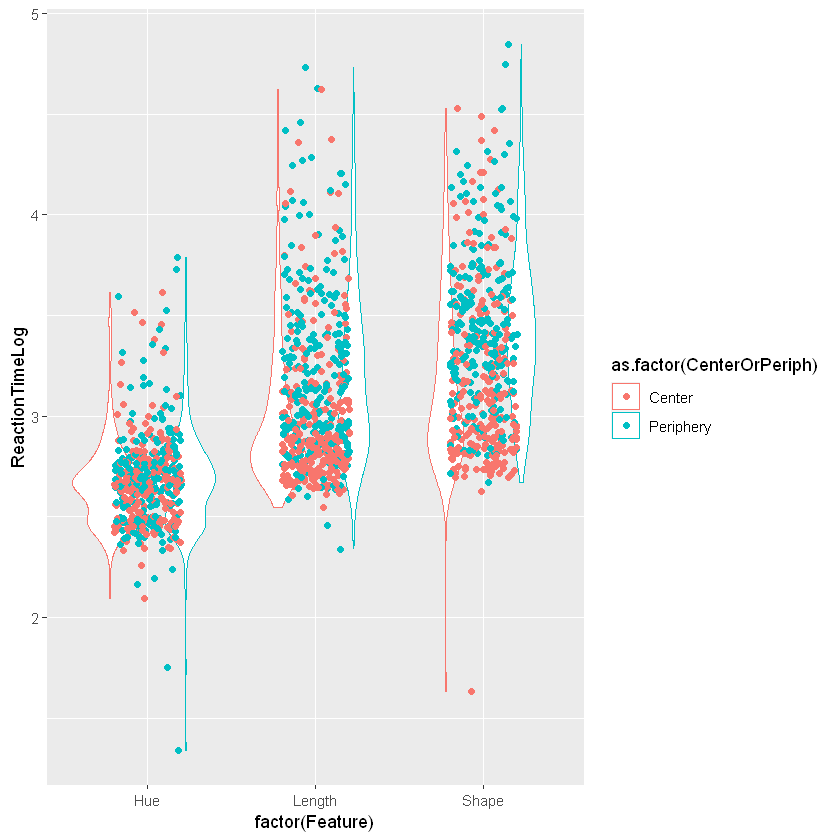

In [14]:
# Draw the jittered violin plot
featureRT = ggplot(data=df, aes(factor(Feature),ReactionTimeLog,color=as.factor(CenterOrPeriph))) +
  geom_violin() +
  geom_point(position=position_jitter(width=0.2,height=0)) +
  ggtitle("Jittered Violin plot of Reaction Time(log) by target location")
plot(featureRT)

### 2.2). RT(log), marked with spatial pattern (gridded or random)

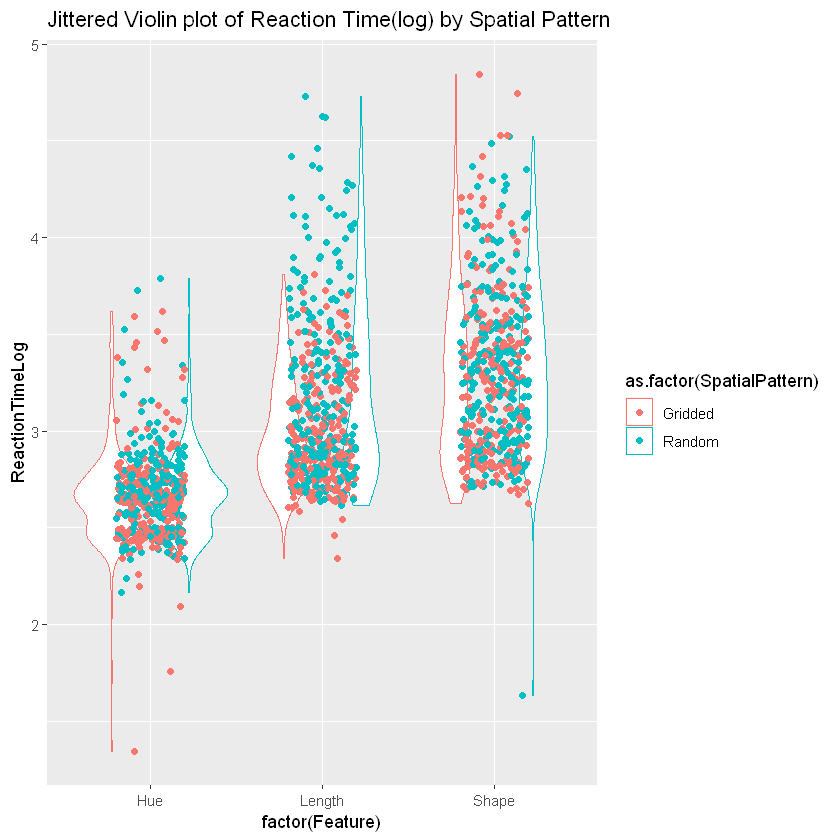

In [15]:
# Draw the jittered violin plot
featureRT = ggplot(data=df, aes(factor(Feature),ReactionTimeLog,color=as.factor(SpatialPattern))) +
  geom_violin() +
  geom_point(position=position_jitter(width=0.2,height=0))+
  ggtitle("Jittered Violin plot of Reaction Time(log) by Spatial Pattern")
plot(featureRT)

## 3). Box plots

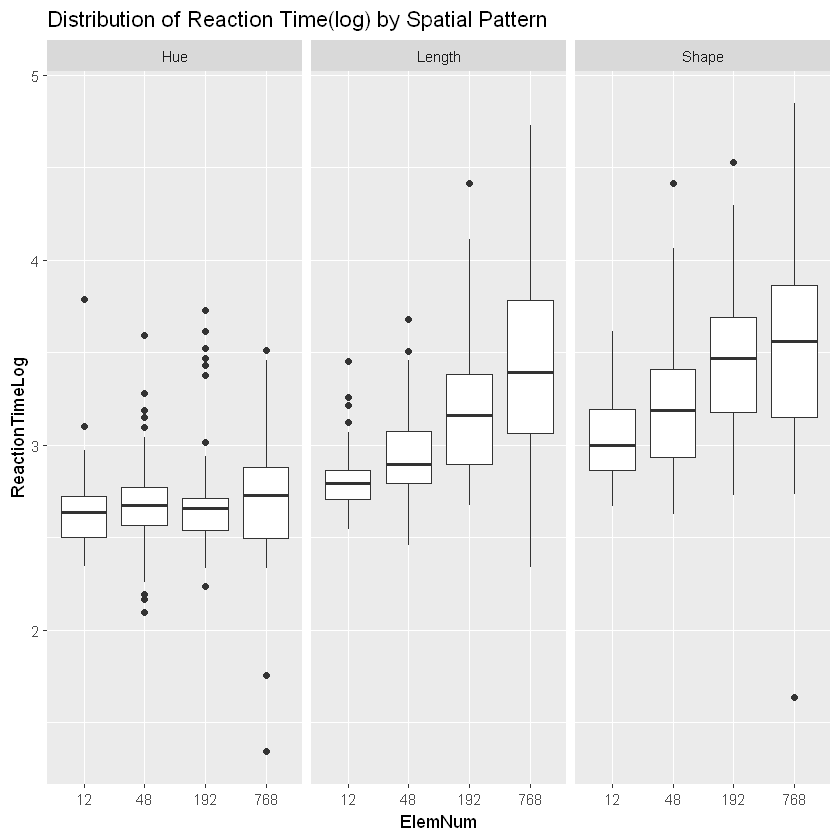

In [16]:
# Draw the box plot
dataDistribution = ggplot(df, aes(x = ElemNum, y = ReactionTimeLog)) +
  geom_boxplot() +
  facet_grid(.~Feature) +
  ggtitle("Distribution of Reaction Time(log) by Spatial Pattern")
plot(dataDistribution)